## Remote Work and Mental Health

https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health/data


### Table of Contents
- [1.Importing Libraries](#1.Importing-Libraries)
- [2.Loading Data](#2.Loading-Data)
- [3.Data Preprocessing](#3.Data-Preprocessing)
  - [3.1.Data Size and Info](#3.1.Data-Size-and-Info)
  - [3.2.Checking for Null Values](#3.2.Checking-for-Null-Values)
  - [3.3.Cleaning Data](#3.3.Cleaning-Data)
- [4.Checking Unique values of different columns](#4.Checking-Unique-values-of-different-columns)
- [5.Data Visualization](#5.Data-Visualization)
  - [5.1.Data Distribution and Key Observation](#5.1.Data-Distribution-and-Key-Observation)  
  - [5.2.Mental Health conditions :Distribution and Gender Insights](#5.2.Mental-Health-conditions-:Distribution-and-Gender-Insights])
  - [5.3.Exploring Work Location](#5.3.Exploring-Work-Location)
  - [5.4.Mental Health Condition and Workplace Factors ](#5.4.Mental-Healt-Condition-and-Workplace-Factors )
  - [5.4.Work-Life Balance Insights](#5.4.Work-Life-Balance-Insights)
  - [5.6.Work Life Balance Rating By Region](#5.6.Work-Life-Balance-Rating-By-Region)
  - [5.7.The Relationship Between Sleep Quality, Stress Levels, and Mental Health Conditions](#5.7.The-Relationship-Between-Sleep-Quality,-Stress-Levels,-and-Mental-Health-Conditions)
  - [5.8.Impact of Work Location and Physical Activity on Mental Health Conditions](#5.8.Impact-of-Work-Location-and-Physical-Activity-on-Mental-Health-Conditions)
  - [5.9. Correlation Insights](#5.9.Correlation-Insights)
- [6.Machine Learning](#6.Machine-Learning)
  - [6.1.Feature Engineering](#6.1.Feature-Engineering)
  - [6.2.Train the model](#6.2.Train-the-model)
  - [6.3.Model Evaluation](#6.3.Model-Evaluation)
  - [6.4.Analysis of the Results](#6.4.Analysis-of-the-Results)
  - [6.5.Model Selection and Metrics](#6.5.Model-Selection-and-Metrics)
- [7.Model Performance Summary](#7.Model-Performance-Summary)




### 1. Importing Libraries

In [3]:
 # importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, recall_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
# Set visualization styles
sns.set(style="whitegrid")


  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


### 2.Loading-Data

In [4]:
#loading the data
df=pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")
df.head(5)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


### 3.Data Preprocessing

#### 3.1.Data Size and Info

In [5]:
#checking the size of the data
print(f"Size of the data is : {df.shape}")

Size of the data is : (5000, 20)


In [6]:
#checking the columns 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [7]:
#checking the statistics of data
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


#### 3.2. Checking for Null Values

In [8]:
# checking for null values and sorting the columns that has the most null values
print(df.isnull().sum().sort_values(ascending=False))

Physical_Activity                    1629
Mental_Health_Condition              1196
Employee_ID                             0
Age                                     0
Sleep_Quality                           0
Company_Support_for_Remote_Work         0
Satisfaction_with_Remote_Work           0
Social_Isolation_Rating                 0
Productivity_Change                     0
Access_to_Mental_Health_Resources       0
Stress_Level                            0
Work_Life_Balance_Rating                0
Number_of_Virtual_Meetings              0
Hours_Worked_Per_Week                   0
Work_Location                           0
Years_of_Experience                     0
Industry                                0
Job_Role                                0
Gender                                  0
Region                                  0
dtype: int64


In [9]:
#Taking a closer look at coloumns having null values
df[['Physical_Activity','Mental_Health_Condition']].head(10)

,Physical_Activity,Mental_Health_Condition
0,Weekly,Depression
1,Weekly,Anxiety
2,NaN,Anxiety
3,NaN,Depression
4,Weekly,NaN
5,NaN,NaN
6,Daily,Anxiety
7,NaN,Depression
8,Daily,NaN
9,Weekly,Depression


In [10]:
#checking unique values in Mental_Health_Condition column
df['Mental_Health_Condition'].unique()

array(['Depression', 'Anxiety', nan, 'Burnout'], dtype=object)

In [11]:
#checking unique values in Phyical_Activity column
df['Physical_Activity'].unique()

array(['Weekly', nan, 'Daily'], dtype=object)

In [12]:
#checking the count for each value in Physical_Activity column 
df['Physical_Activity'].value_counts()

Physical_Activity
Weekly    1755
Daily     1616
Name: count, dtype: int64

In [13]:
##checking the count for each value in Mental_Health_Condition column 
df['Mental_Health_Condition'].value_counts()

Mental_Health_Condition
Burnout       1280
Anxiety       1278
Depression    1246
Name: count, dtype: int64

#### 3.3.Cleaning Data

In [14]:
# Dropping null values
# Dropping Employee_ID column as it is not useful for analysis
df=df.dropna()
del df['Employee_ID']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2577 entries, 0 to 4997
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                2577 non-null   int64 
 1   Gender                             2577 non-null   object
 2   Job_Role                           2577 non-null   object
 3   Industry                           2577 non-null   object
 4   Years_of_Experience                2577 non-null   int64 
 5   Work_Location                      2577 non-null   object
 6   Hours_Worked_Per_Week              2577 non-null   int64 
 7   Number_of_Virtual_Meetings         2577 non-null   int64 
 8   Work_Life_Balance_Rating           2577 non-null   int64 
 9   Stress_Level                       2577 non-null   object
 10  Mental_Health_Condition            2577 non-null   object
 11  Access_to_Mental_Health_Resources  2577 non-null   object
 12  Productivit

In [16]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000
mean,40.910749,17.760574,39.634459,7.446643,2.985642,3.004269,3.001552
std,11.258183,9.981957,11.886100,4.592684,1.413454,1.388304,1.394866
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,3.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,39.000000,7.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,11.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [17]:
#checking and confirming that there are no null values in the data set
df.isnull().sum()

Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [18]:
#checking for duplicates
df.duplicated().sum()

0

### 4.Checking Unique values of different columns

In [19]:
#Checking Unique values of different columns for further Analysis and visualization
df['Region'].unique()

array(['Europe', 'Asia', 'North America', 'Oceania', 'Africa',
       'South America'], dtype=object)

In [20]:
df["Age"].unique()

array([32, 40, 31, 30, 51, 36, 56, 45, 49, 59, 26, 43, 53, 47, 22, 48, 24,
       57, 33, 25, 50, 28, 38, 29, 27, 42, 58, 55, 35, 41, 44, 34, 60, 52,
       37, 54, 39, 46, 23], dtype=int64)

In [21]:
print(df['Industry'].unique())
print(df['Industry'].value_counts())
print(df['Job_Role'].unique())
print(df['Stress_Level'].unique())
print(df['Gender'].unique())

['Healthcare' 'IT' 'Consulting' 'Manufacturing' 'Retail' 'Education'
 'Finance']
Industry
IT               412
Retail           387
Finance          379
Healthcare       367
Education        356
Manufacturing    341
Consulting       335
Name: count, dtype: int64
['HR' 'Data Scientist' 'Sales' 'Marketing' 'Designer' 'Project Manager'
 'Software Engineer']
['Medium' 'Low' 'High']
['Non-binary' 'Female' 'Prefer not to say' 'Male']


In [22]:
#Average work hours across Industry
ind_hours=df.groupby(['Industry'])['Hours_Worked_Per_Week'].mean().reset_index()
print(ind_hours)

        Industry  Hours_Worked_Per_Week
0     Consulting              39.722388
1      Education              39.719101
2        Finance              38.316623
3     Healthcare              40.209809
4             IT              40.029126
5  Manufacturing              40.513196
6         Retail              39.031008


In [23]:
df['Hours_Worked_Per_Week'].mean()

39.63445867287544

In [24]:
df['Access_to_Mental_Health_Resources'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['Work_Location'].unique()

array(['Hybrid', 'Remote', 'Onsite'], dtype=object)

In [26]:
df['Productivity_Change'].unique()

array(['Decrease', 'Increase', 'No Change'], dtype=object)

In [27]:
df['Mental_Health_Condition'].unique()

array(['Depression', 'Anxiety', 'Burnout'], dtype=object)

### 5.Data Visualization

#### 5.1.Data Distribution and Key Observation

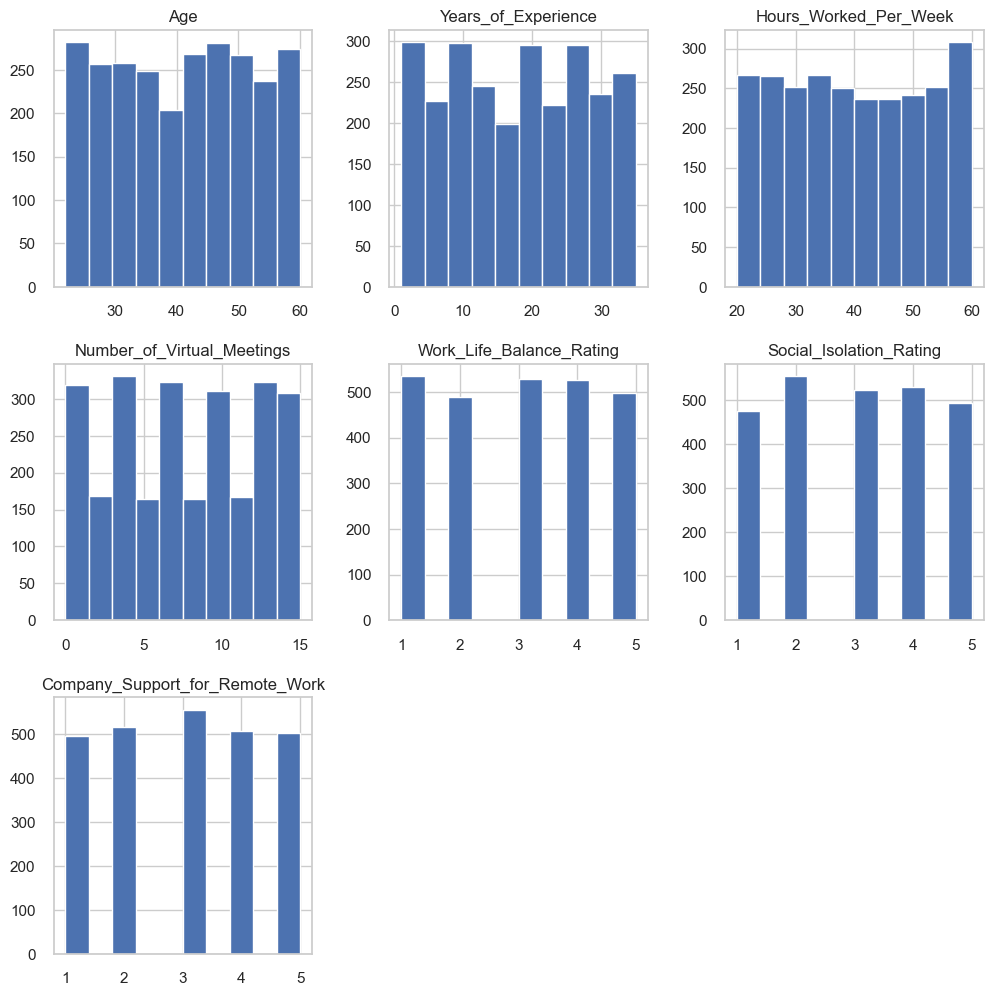

In [28]:
#histogram of different columns

df.hist(figsize=(12,12))
plt.savefig("featuresplot")


###### Observation

Most columns in the dataset show uniform or fairly distributed values, without extreme skewness or concentration around specific values. The data appears to cover a broad range across most attributes, which can be beneficial for exploring relationships between these variables in terms of remote work and mental health outcomes.

#### 5.2.Mental Health conditions :Distribution and Gender Insights

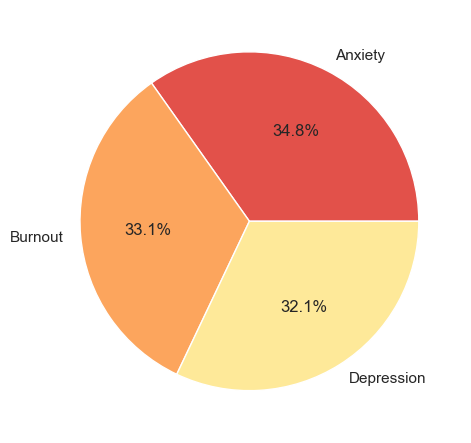

In [128]:
#distribution of Mental_Health_Conditions across the data set
mhealth=df['Mental_Health_Condition'].value_counts()
plt.pie(mhealth , labels=mhealth.index,autopct='%1.1f%%', colors=sns.color_palette('Spectral'));

<iframe src="https://www.kaggle.com/embed/waqi786/remote-work-mental-health-eda?cellIds=7&kernelSessionId=197811618" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="📊 Remote Work &amp; Mental Health EDA 🧑‍💻✨"></iframe>

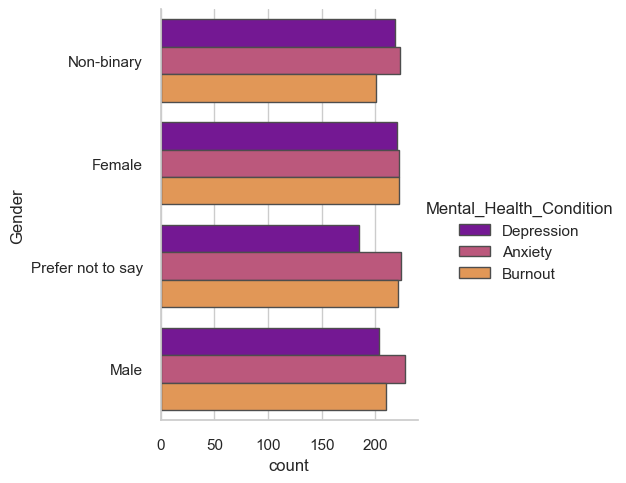

In [129]:
#Mental_Health_Condition across gender
sns.catplot(data=df,y='Gender',hue='Mental_Health_Condition',kind="count",palette='plasma',edgecolor=".3",);


## Analysis
#### Pie chart :
Anxiety is the most prevalent condition, accounting for 34.8% of the cases. Burnout follows closely with 33.1%.
Depression is the least common, representing 32.1%.

#### Bar Chart :
Anxiety is the most reported condition across all genders.Non-binary individuals have the highest proportion of Depression cases.
Female individuals have the highest proportion of Burnout cases.
Overall, the data suggests that Anxiety is the most common mental health condition among all genders, followed by Burnout and Depression.


#### 5.3.Exploring Work Location

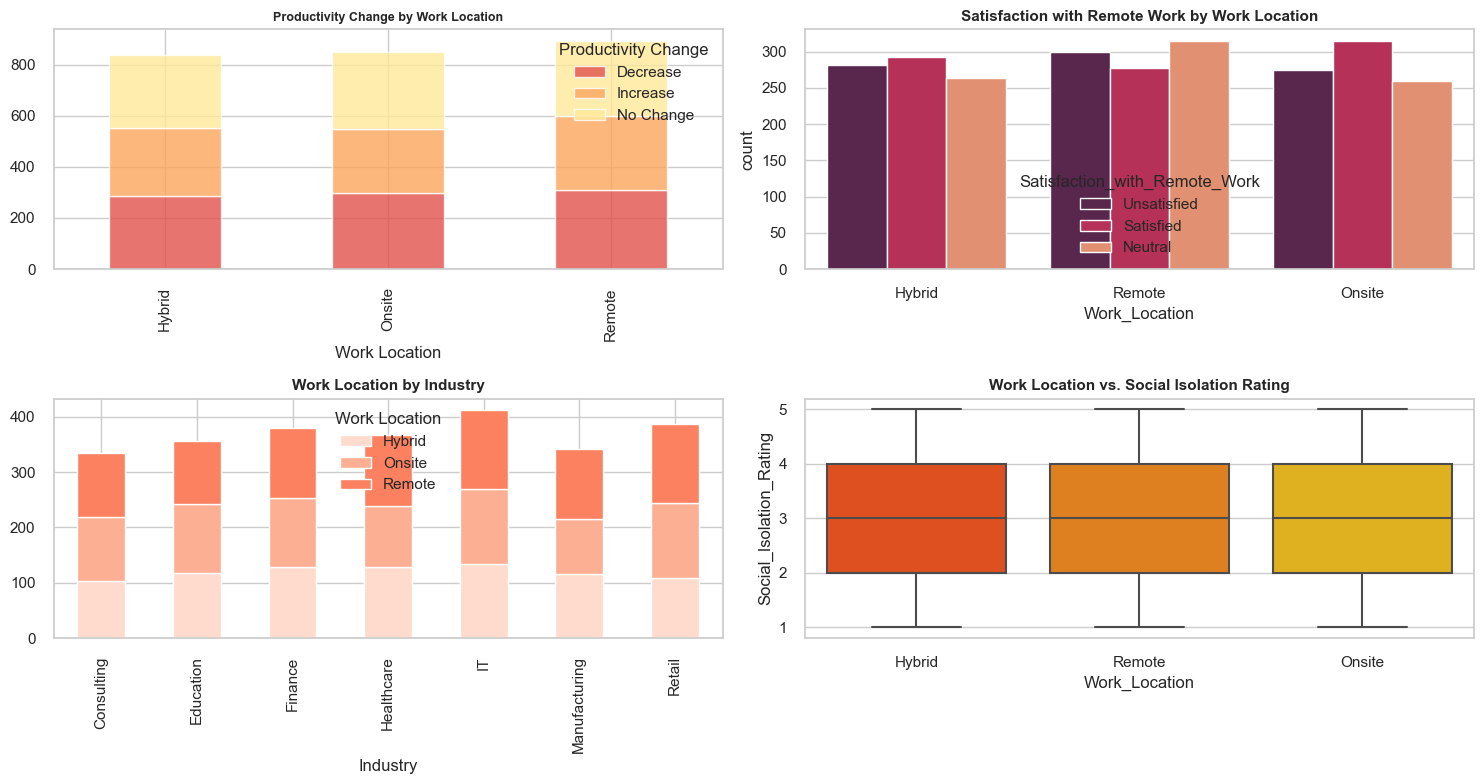

In [130]:
# Dashboard for Work Location
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
axs=axs.flatten()

# Plotting a stacked bar chart for productivity change with respect to location
change = df.groupby(['Work_Location', 'Productivity_Change']).size().unstack()
change.plot(kind='bar', stacked=True, color=sns.color_palette('Spectral'), alpha=0.8, ax=axs[0]);
axs[0].set_title('Productivity Change by Work Location', fontsize=9, fontweight='bold')
axs[0].set_xlabel('Work Location')
#axs[0].set_ylabel('Count')
axs[0].legend(title='Productivity Change')

# Plotting a bar chart for Satisfaction_with_Remote_Work and Work_Location 
sns.countplot(x='Work_Location', hue='Satisfaction_with_Remote_Work', data=df, palette='rocket', ax=axs[1])
axs[1].set_title('Satisfaction with Remote Work by Work Location',fontsize=11, fontweight='bold')


# Plot for Company_Support_for_Remote_Work,work location for different industries 
# Create contingency table
wl_com = pd.crosstab(index=df['Industry'], columns=df['Work_Location'])
wl_com.plot(kind='bar', stacked=True,color=sns.color_palette('Reds'), ax=axs[2])
axs[2].set_xlabel('Industry')
#axs[2].set_ylabel('Count')
axs[2].set_title('Work Location by Industry',fontsize=11, fontweight='bold')
axs[2].legend(title='Work Location')


# Plot for work location vs Social_Isolation_Rating 
sns.boxplot(data=df, x='Work_Location', y='Social_Isolation_Rating', palette='autumn', ax=axs[3])
axs[3].set_title('Work Location vs. Social Isolation Rating',fontsize=11, fontweight='bold')


# Adjust layout and show the complete dashboard
plt.tight_layout()
plt.show()




### Analysis

- **Productivity:** Hybrid work drives the highest productivity gains, while remote work risks more productivity drops than onsite work.  
- **Satisfaction:** Remote work shows higher satisfaction and neutrality than onsite, with hybrid work offering balanced satisfaction.  
- **Industry Trends:** Consulting, Education, and Healthcare prefer hybrid work. Manufacturing and Retail lean towards onsite, while Finance and IT show balanced preferences.  
- **Social Isolation:** Onsite work minimizes social isolation, while remote and hybrid work show higher levels.  

#### Recommendations  

- Use **flexible work models** to balance employee needs and work requirements.  
- Mitigate remote work's isolation with regular check-ins and social activities.  
- Leverage **data-driven strategies** to optimize work location policies.  

#### Further Steps  

- Analyze individual-level and longitudinal data for deeper insights.  
- Conduct qualitative research to understand employee preferences and challenges.

By understanding the nuances of work location preferences and their impact on various factors, organizations can create more effective and employee-centric work environments.


#### 5.4.Mental Health Condition and Workplace Factors 

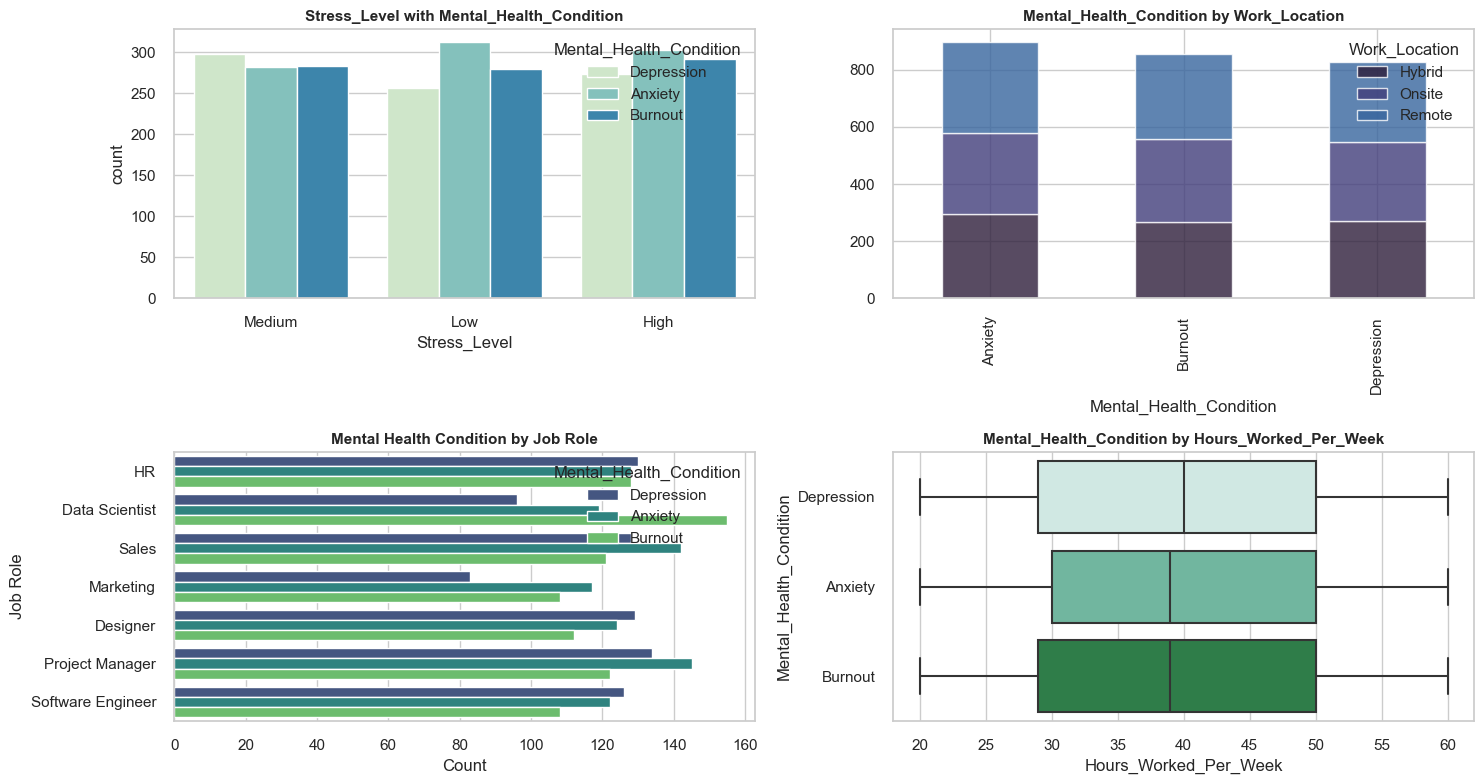

In [131]:
# Dashboard for Mental health condition
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
axs=axs.flatten()

#Plotting for Mental_Health_Condition and Stress_Level
sns.countplot(x='Stress_Level', hue='Mental_Health_Condition', data=df, palette='GnBu', ax=axs[0])
axs[0].set_title('Stress_Level with Mental_Health_Condition',fontsize=11, fontweight='bold')

# Plotting a stacked bar chart for productivity change with respect to location
change = df.groupby(['Mental_Health_Condition', 'Work_Location']).size().unstack()
change.plot(kind='bar', stacked=True, color=sns.color_palette('mako'),alpha=0.8,ax=axs[1]);
axs[1].set_title('Mental_Health_Condition by Work_Location',fontsize=11, fontweight='bold')
axs[1].set_xlabel('Mental_Health_Condition')
#axs[0].set_ylabel('Count')
#axs[0].legend(title='Productivity Change')

# Create the horizontal count plot for Mental Health Condition by Job Role
sns.countplot(y='Job_Role', hue='Mental_Health_Condition', data=df, palette='viridis',ax=axs[2])
axs[2].set_title('Mental Health Condition by Job Role', fontsize=11, fontweight='bold')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Job Role')

#create plot for 'Mental_Health_Condition' by 'Hours_Worked_Per_Week' 
sns.boxplot(data = df , x = 'Hours_Worked_Per_Week' , y = 'Mental_Health_Condition' , palette='BuGn')
axs[3].set_title('Mental_Health_Condition by Hours_Worked_Per_Week', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


###  Analysis 
1.Stress and Mental Health Resources
  High stress consistently impacts WLB negatively, underscoring the need for comprehensive stress-management strategies.
  
2.Remote Work Satisfaction:
  Satisfaction levels with remote work are a strong determinant of WLB, suggesting that remote work isn’t a one-size-fits-all solution but requires thoughtful implementation.
  
3.Years of Experience:
  Work-life balance is dynamic and changes with career progression, suggesting the need for targeted interventions for employees at different stages.
  
4.Industry Context:
  Though differences across industries are subtle, industries with traditionally high demands (e.g., Consulting) must prioritize employee well-being to remain competitive in attracting and retaining talent.

The dashboard highlights that stress management and satisfaction with remote work are the most influential factors affecting WLB**, while years of experience and industry differences play secondary roles. Organizations should take a customized, multifaceted approach to address these issues, ensuring that employees thrive across all demographics and career stages.

#### 5.5.Work-Life Balance Insights

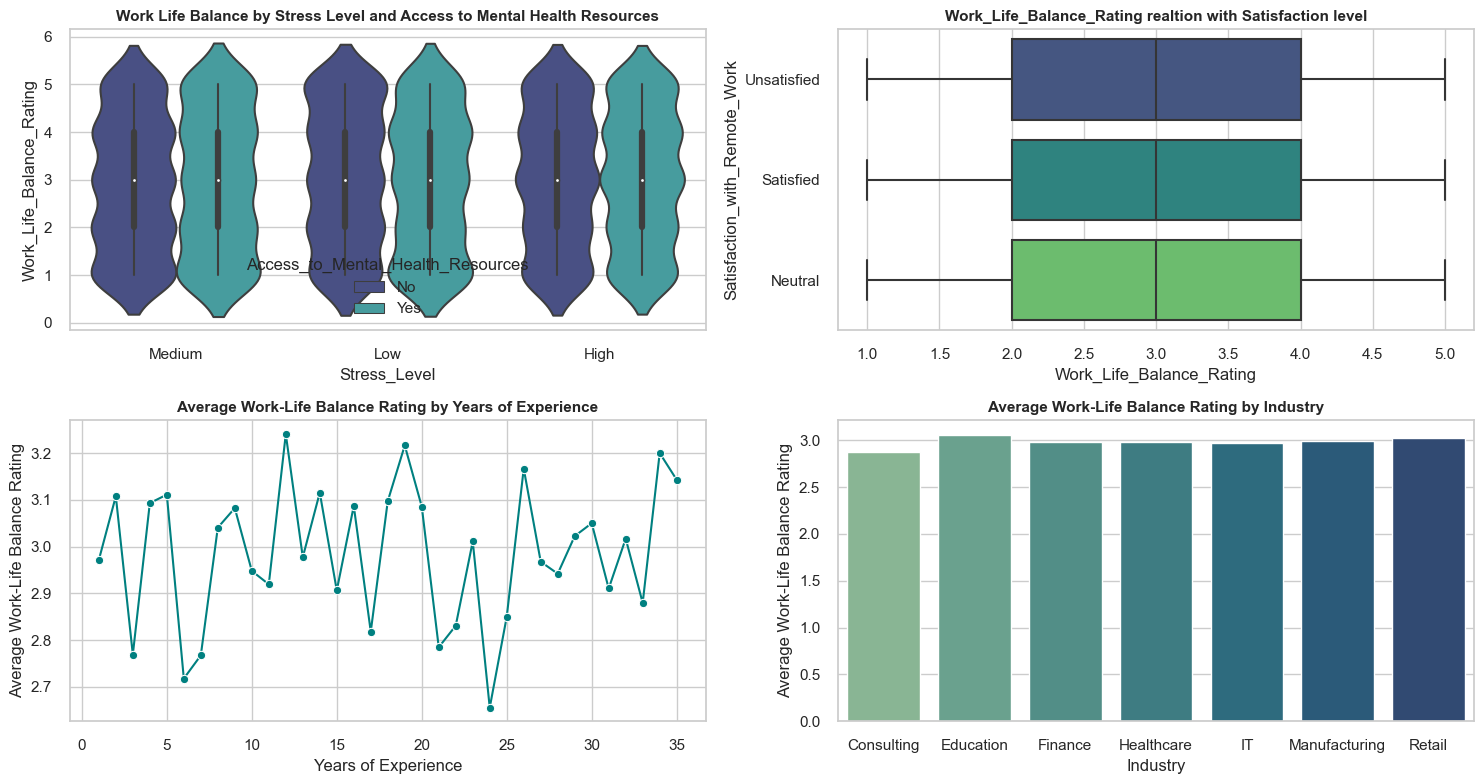

In [132]:
# Dashboard for Work_life_Balancing Rating
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
axs=axs.flatten()

#Violin plot for Work Life Balance by Stress Level and Access to Mental Health Resources
sns.violinplot(data=df, x='Stress_Level', y='Work_Life_Balance_Rating', hue='Access_to_Mental_Health_Resources',palette='mako', ax=axs[0] )
axs[0].set_title("Work Life Balance by Stress Level and Access to Mental Health Resources",fontsize=11, fontweight='bold')

#Boxplot Work_Life_Balance_Rating realtion with Satisfaction level
sns.boxplot(data = df , x = 'Work_Life_Balance_Rating' , y = 'Satisfaction_with_Remote_Work' , palette='viridis',ax=axs[1])
axs[1].set_title('Work_Life_Balance_Rating realtion with Satisfaction level',fontsize=11, fontweight='bold')

#lineplot for Years_of_Experience  vs Work_Life_Balance_Rating
avg_rating = df.groupby('Years_of_Experience')['Work_Life_Balance_Rating'].mean().reset_index()
sns.lineplot(data=avg_rating, x='Years_of_Experience', y='Work_Life_Balance_Rating', marker='o', color='teal',ax=axs[2])
axs[2].set_title('Average Work-Life Balance Rating by Years of Experience', fontsize=11, fontweight='bold')
axs[2].set_xlabel('Years of Experience')
axs[2].set_ylabel('Average Work-Life Balance Rating')

# Create the horizontal count plot for Mental Health Condition by Job Role

# Calculate the mean work-life balance rating for each industry
avg_rating_by_industry = df.groupby('Industry')['Work_Life_Balance_Rating'].mean().reset_index()

# Create a bar plot
sns.barplot(data=avg_rating_by_industry, x='Industry', y='Work_Life_Balance_Rating', palette='crest',ax=axs[3])

# Add title and labels
axs[3].set_title('Average Work-Life Balance Rating by Industry', fontsize=11, fontweight='bold')
axs[3].set_xlabel('Industry')
axs[3].set_ylabel('Average Work-Life Balance Rating')

plt.tight_layout()
plt.show()

### Analysis

1.Stress Level with Mental Health Condition : This plot shows the distribution of mental health conditions across different stress levels. Burnout appears to be the most common condition, especially among those with high stress levels. 

 2. Mental Health Condition by Work Location : This plot compares the frequency of mental health conditions for different work locations. All three conditions are most prevalent among remote workers. 

 3. Mental Health Condition by Job Role  : This plot displays the frequency of mental health conditions for various job roles. Burnout is the most common condition, particularly among HR, Sales, and Project Manager roles.

 4. Mental Health Condition by Hours Worked Per Week :This boxplot illustrates the distribution of hours worked for different mental health conditions. Individuals with burnout tend to work significantly more hours compared to those with anxiety or depression.

Overall, the dashboard highlights the prevalence of burnout across various work settings and job roles, especially among those working remotely or long hours.


#### 5.6 Work Life Balance Rating By Region

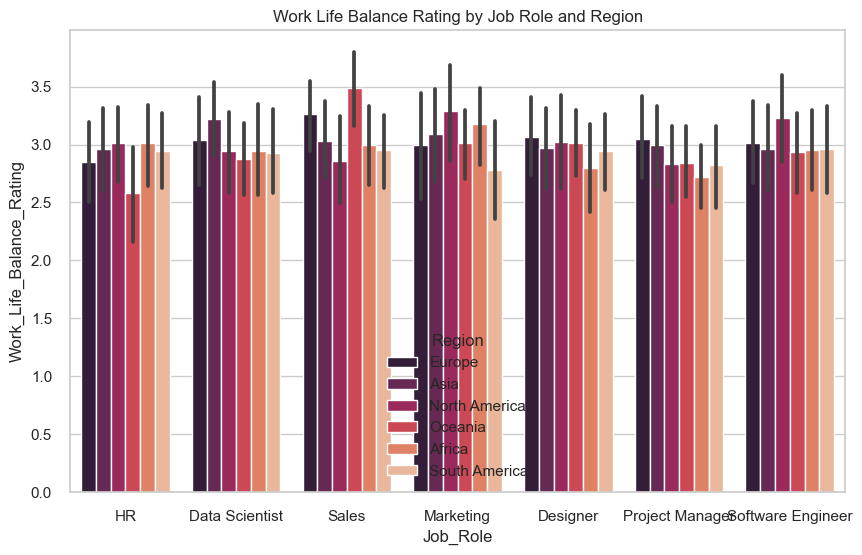

In [133]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Job_Role', y='Work_Life_Balance_Rating', hue='Region', palette= 'rocket')
plt.title("Work Life Balance Rating by Job Role and Region")
plt.show()

### Analysis

The chart indicates that Asia consistently has the highest work-life balance rating across all job roles. Software Engineers generally have the highest ratings, while HR and Sales roles tend to have lower ratings. Regions like Africa and South America consistently show lower work-life balance ratings compared to Asia, Europe, and North America.

#### Possible Insights:

Regional Factors: Cultural differences, workplace policies, and economic conditions in different regions may play a significant role in work-life balance.
Job Role Factors: The nature of different job roles can influence work-life balance. For instance, roles with high client interaction or tight deadlines might have lower ratings.
Company Culture: Company culture and management practices can significantly impact work-life balance.

#### 5.7.The Relationship Between Sleep Quality, Stress Levels, and Mental Health Conditions

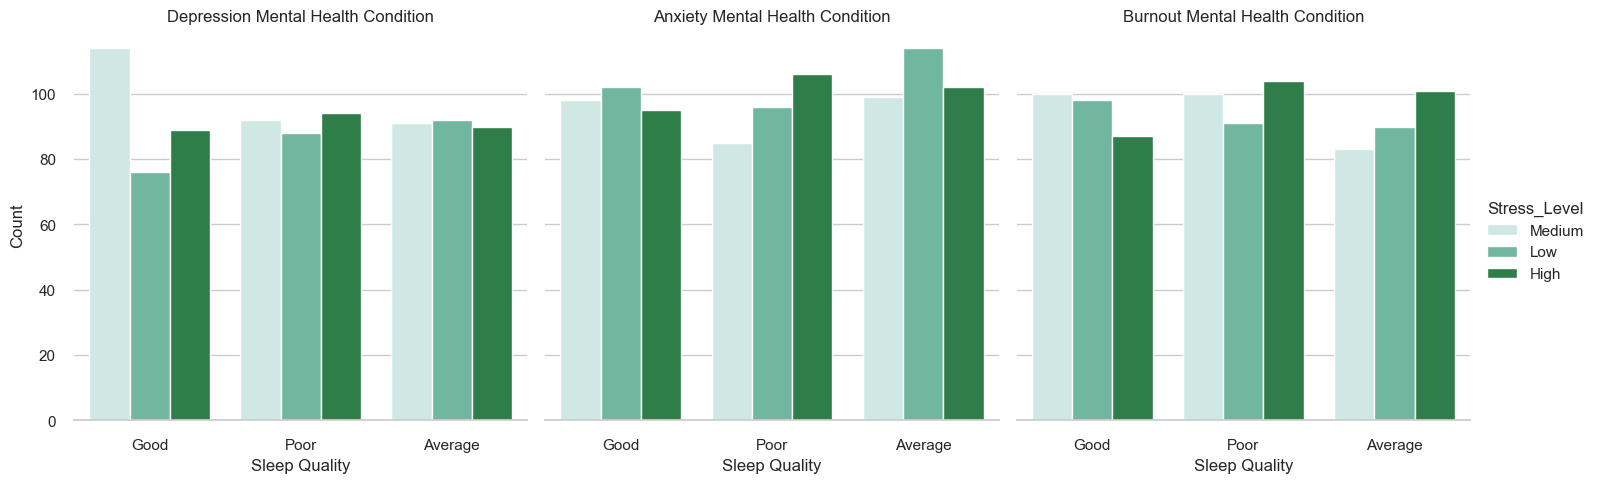

In [134]:

# Facet Grid with Seaborn
g = sns.catplot(
    data=df,
    x='Sleep_Quality',
    hue='Stress_Level',
    col='Mental_Health_Condition',
    kind='count',
    height=5,
    aspect=1,
    palette='BuGn'
)

g.set_axis_labels("Sleep Quality", "Count")
g.set_titles("{col_name} Mental Health Condition")
g.despine(left=True)

plt.show()



#### Observations:
1. **Depression:**
   - Individuals with good sleep quality and medium stress levels are most common.
   - Poor and average sleep quality have a more balanced distribution of stress levels, with high-stress individuals appearing more prominently.

2. **Anxiety:**
   - Poor sleep quality and high stress correlate with a higher count of individuals experiencing anxiety.
   - Average sleep quality also shows a strong presence of individuals with high stress, though medium stress remains significant.

3. **Burnout:**
   - High stress is consistently prevalent across all sleep quality categories, particularly with poor and average sleep quality.
   - Good sleep quality is linked to relatively fewer cases, with medium stress levels being prominent.

### Conclusion:
High stress levels appear to exacerbate mental health conditions irrespective of sleep quality, although good sleep quality is associated with lower counts for all conditions. Improving sleep quality and managing stress might significantly reduce the prevalence of these mental health issues.

#### 5.8.Impact of Work Location and Physical Activity on Mental Health Conditions

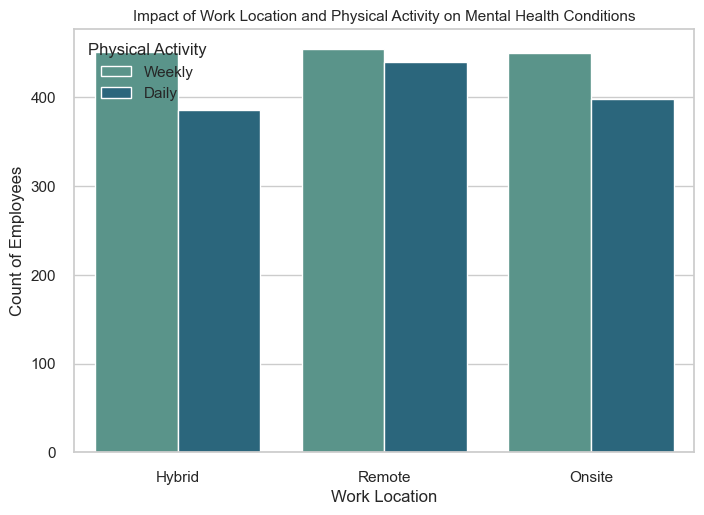

In [135]:

# Create a stacked bar plot
sns.countplot(data=df, x='Work_Location', hue='Physical_Activity', palette='crest')

# Add labels and title
plt.title('Impact of Work Location and Physical Activity on Mental Health Conditions', fontsize=11)
plt.xlabel('Work Location')
plt.ylabel('Count of Employees')

# Display the plot
plt.legend(title='Physical Activity', loc='upper left')
plt.show()


### Obseravtion:
- **Weekly physical activity** is more prevalent across all work locations, suggesting that a larger proportion of employees prefer engaging in physical activities on a less frequent basis.
- **Remote workers** are the most active in terms of weekly physical activity, possibly due to the flexibility in their schedules.
- Promoting daily physical activity at all work locations, especially onsite and hybrid, could improve employee well-being and health outcomes.

This analysis highlights the need for organizations to create opportunities and encourage regular physical activity among employees across different work environments.

#### 5.9.Correlation Insights

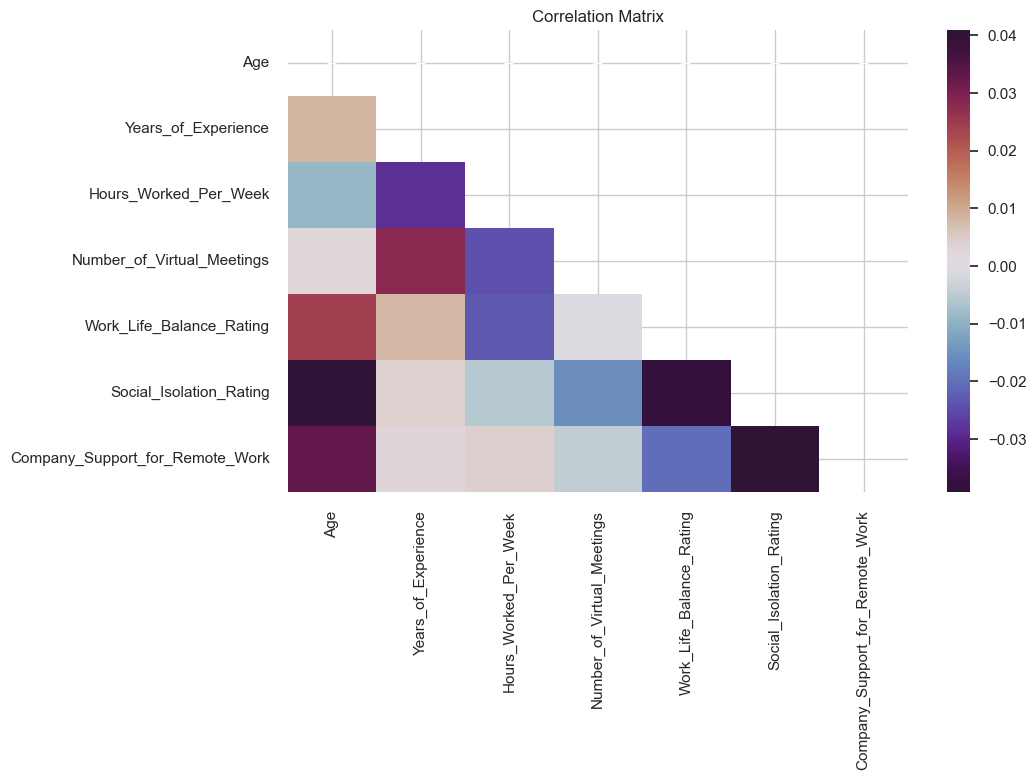

In [136]:
plt.figure(figsize=(10, 6))
corr=df.corr(numeric_only = True)
sns.heatmap(corr, annot=True , fmt='.2f', cmap='twilight_shifted', mask=np.triu(corr))
plt.title('Correlation Matrix')
plt.show()

#### Correlation Summary  

- Weak Relationships: Most correlations are weak, indicating no strong linear relationships among variables.  
- Positive Correlations: Examples include "Years of Experience" and "Hours Worked Per Week," suggesting experienced employees may work longer hours.  
- Negative Correlations: Notable examples are:  
  - "Social Isolation Rating" and "Company Support for Remote Work" (better support lowers isolation).  
  - "Number of Virtual Meetings" and "Work-Life Balance" (more meetings may hurt balance).  
- Age Impact: No significant correlations with "Age."  

#### Limitations  

- Correlation ≠ causation; other factors might influence these relationships.  
- Weak correlations suggest key drivers could be missing from the analysis.  

#### Conclusion  
The matrix offers a broad view but requires deeper analysis to uncover actionable insights.



### 6.Machine Learning

In [137]:
corr_1=df.corr(numeric_only = True).unstack().sort_values(ascending = False).drop_duplicates()
print(corr_1)

Age                              Age                                1.000000
Social_Isolation_Rating          Company_Support_for_Remote_Work    0.040891
Company_Support_for_Remote_Work  Age                                0.033035
Years_of_Experience              Number_of_Virtual_Meetings         0.028135
Work_Life_Balance_Rating         Age                                0.024241
Years_of_Experience              Age                                0.008418
                                 Work_Life_Balance_Rating           0.008066
Company_Support_for_Remote_Work  Hours_Worked_Per_Week              0.004342
Social_Isolation_Rating          Years_of_Experience                0.004276
Company_Support_for_Remote_Work  Years_of_Experience                0.002926
Number_of_Virtual_Meetings       Age                                0.002438
                                 Work_Life_Balance_Rating          -0.000567
Company_Support_for_Remote_Work  Number_of_Virtual_Meetings        -0.004350

#### 6.1.Feature Engineering

In [138]:
# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode (i.e., those with 'object' dtype)
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 
                       'Mental_Health_Condition','Access_to_Mental_Health_Resources','Productivity_Change', 
                       'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 
                       'Region']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [139]:
features_df = df.drop('Mental_Health_Condition', axis=1)
X=features_df.values
y=df['Mental_Health_Condition']

#### 6.2.Train the model

In [140]:
#Split the data set in a training set (80%) and a test set (20%)
X_train, X_test ,y_train ,y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

In [141]:
LR=LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=200)
KNN= KNeighborsClassifier()
CART=DecisionTreeClassifier()
SVM=SVC(gamma='auto')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [142]:
# Step 6 : Train the model
LR.fit(X_train,y_train)
KNN.fit(X_train,y_train)
CART.fit(X_train,y_train)
SVM.fit(X_train,y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### 6.3.Model Evaluation

In [143]:
#Predict on the test set
y_pred_rf = rf_model.predict(X_test)

#Evaluate performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.30
              precision    recall  f1-score   support

           0       0.30      0.35      0.32       180
           1       0.28      0.27      0.27       173
           2       0.32      0.28      0.30       163

    accuracy                           0.30       516
   macro avg       0.30      0.30      0.30       516
weighted avg       0.30      0.30      0.30       516



In [144]:
#Evaluate model
accuracy_score_LR=accuracy_score(y_test,LR.predict(X_test))
accuracy_score_KNN = accuracy_score(y_test,KNN.predict(X_test))
accuracy_score_CART = accuracy_score(y_test,CART.predict(X_test))
accuracy_score_SVM = accuracy_score(y_test,SVM.predict(X_test))
 
print('LR:',accuracy_score_LR)
print('KNN:',accuracy_score_KNN)
print('CART:',accuracy_score_CART)
print('SVM:',accuracy_score_SVM)



LR: 0.3023255813953488
KNN: 0.3682170542635659
CART: 0.3313953488372093
SVM: 0.34689922480620156


In [116]:
print(classification_report(y_test, KNN.predict(X_test)))


              precision    recall  f1-score   support

           0       0.38      0.56      0.45       180
           1       0.38      0.35      0.36       173
           2       0.33      0.18      0.24       163

    accuracy                           0.37       516
   macro avg       0.36      0.36      0.35       516
weighted avg       0.36      0.37      0.35       516



In [145]:
# Recall for Logistic Regression
recall_lr = recall_score(y_test, LR.predict(X_test), average='macro')

# Recall for K-Nearest Neighbors
recall_knn = recall_score(y_test, KNN.predict(X_test), average='macro')

# Recall for Decision Tree
recall_cart = recall_score(y_test, CART.predict(X_test), average='macro')

# Recall for Support Vector Machine
recall_svm = recall_score(y_test, SVM.predict(X_test), average='macro')

# Recall for Random Forest
recall_rf = recall_score(y_test, y_pred_rf, average='macro')

print(f"Recall (Logistic Regression): {recall_lr}")
print(f"Recall (KNN): {recall_knn}")
print(f"Recall (Decision Tree): {recall_cart}")
print(f"Recall (SVM): {recall_svm}")
print(f"Recall (Random Forest): {recall_rf}")


Recall (Logistic Regression): 0.29915882228552887
Recall (KNN): 0.3621418148529039
Recall (Decision Tree): 0.33050804270705686
Recall (SVM): 0.34104538774030596
Recall (Random Forest): 0.2973231911297091


In [99]:
from sklearn.ensemble import GradientBoostingClassifier

#Initialize Gradient Boosting model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Train the model
gbm_model.fit(X_train, y_train)

#Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)

#Evaluate performance
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print(f"Gradient Boosting Accuracy: {gbm_accuracy:.2f}")
print(classification_report(y_test, y_pred_gbm))

Gradient Boosting Accuracy: 0.32
              precision    recall  f1-score   support

           0       0.36      0.39      0.38       180
           1       0.32      0.28      0.30       173
           2       0.27      0.28      0.28       163

    accuracy                           0.32       516
   macro avg       0.32      0.32      0.32       516
weighted avg       0.32      0.32      0.32       516



#### 6.4.Analysis of the Results

Models aim to predict mental health outcomes. The performance metrics provided include **accuracy**, **recall**, and the **classification report** for KNN. Let’s analyze the results to determine the best model:

#### Model Performance Summary  

- **Accuracy:** KNN performs best (36.8%), slightly outperforming SVM (34.7%). However, accuracy alone is insufficient for imbalanced datasets.  
- **Recall:** KNN also leads with 36.2%, crucial if identifying mental health issues is a priority.  
- **Precision & F1-Score (KNN):** Precision is low (~0.36), but the macro F1-score (0.35) balances precision and recall.  

#### Conclusion  

KNN is the most reliable model for this task, given its higher recall and accuracy, despite modest precision and F1-scores.

#### 6.5.Model Selection and Metrics
**K-Nearest Neighbors (KNN)** is the most suitable model for this task based on:
- **Highest Recall** (36.2%).
- **Best Accuracy** (36.8%).
- A decent balance of performance across metrics in the classification report.

In [100]:
knnPrediction = KNN.predict(X_test)
knnConf=confusion_matrix(y_test,knnPrediction)
knnConf

array([[100,  49,  31],
       [ 82,  60,  31],
       [ 82,  51,  30]], dtype=int64)

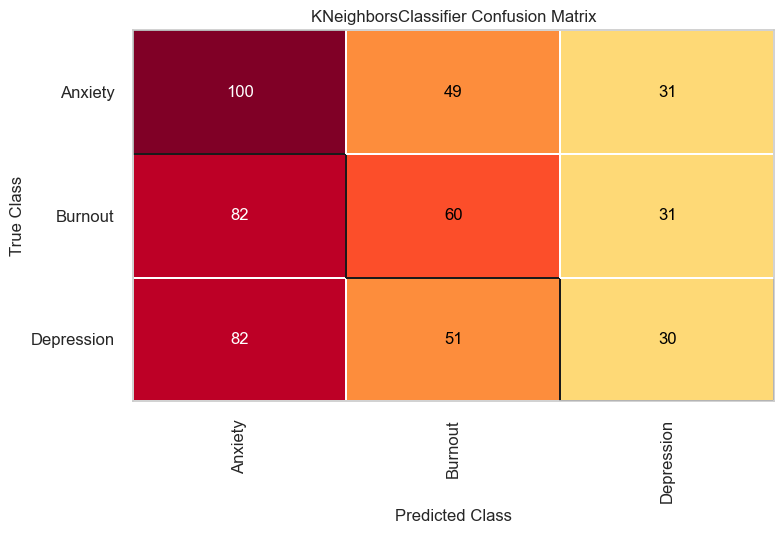

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [101]:

# Initialize the ConfusionMatrix visualizer
visualizer = ConfusionMatrix(KNN, classes=['Anxiety','Burnout','Depression'])

# Fit the visualizer to the training data
visualizer.fit(X_train, y_train)

# Score the visualizer on the test data
visualizer.score(X_test, y_test)
# Display the confusion matrix
visualizer.show()


### Confusion Matrix Overview:
- **True Classes (rows)**: Anxiety, Burnout, Depression
- **Predicted Classes (columns)**: Anxiety, Burnout, Depression
- **Diagonal Values**: Correct predictions for each class (True Positives)
- **Off-Diagonal Values**: Misclassifications for each class (False Positives/Negatives)

---

### **Key Observations**
1. **Class-Wise Performance**:
   - **Anxiety**:
     - Correctly predicted: 100 instances (True Positives)
     - Misclassified as Burnout: 49 instances
     - Misclassified as Depression: 31 instances
   - **Burnout**:
     - Correctly predicted: 60 instances
     - Misclassified as Anxiety: 82 instances
     - Misclassified as Depression: 31 instances
   - **Depression**:
     - Correctly predicted: 30 instances
     - Misclassified as Anxiety: 82 instances
     - Misclassified as Burnout: 51 instances

2. **Class with Best Performance**:
   - **Anxiety** has the highest number of correct predictions (100), indicating relatively better model performance for this class.

3. **Class with Most Misclassifications**:
   - **Depression** has the fewest correct predictions (30) and the highest misclassification rates across other classes.
   - Many Depression cases are misclassified as **Anxiety (82)** or **Burnout (51)**, indicating poor model differentiation for this class.

4. **Balanced Classification Challenge**:
   - There is significant overlap in the classification of **Burnout** and **Depression** into other classes.
   - The high misclassification rates suggest that the model struggles to distinguish between these mental health conditions, potentially due to overlapping feature similarities in the dataset.

---



### 7.Model Performance Summary

#### **1. Dataset Overview**
The dataset has 2,577 entries with features like Age, Years of Experience, Hours Worked, Virtual Meetings, and ratings for Work-Life Balance, Social Isolation, and Company Support for Remote Work. However, the dataset lacks strong correlations with the target variable (e.g., mental health conditions such as Anxiety, Burnout, and Depression), which affects model performance.

#### **2. Reasons for Low Performance**

- **Small Dataset Size**: The 2,577 samples might not be enough for accurate model predictions, especially for complex, multiclass problems. **Solution**: Collect more data to improve model generalization.
  
- **Weak Feature-Target Correlations**: Features like Work-Life Balance and Company Support show low variability and weak correlation with the target variable, leading to noise in predictions.

- **Linear Relationships**: Mental health outcomes are complex, and models like KNN or Logistic Regression may not capture non-linear interactions well.


#### **3. Recommendations**

1. **Increase Dataset Size**: More data is needed for better model performance.
2. **Domain Expertise**: Consult with mental health professionals to identify additional relevant predictors.

#### **Conclusion**
The model's performance can be improved by increasing the dataset size, refining features, and using more advanced algorithms that capture non-linear relationships.